Some machine learning models like linear and logistic regression assume that the variables are normally distributed.
Others benefit from gaussian like distribution.
The X independent variables which will predict y(dependent) are distributed across different range of values.
If the variables are normally distributed then it will boost the perfomance of the model.


# But the main question lies on how can we convert the variables so that they follow the gaussian distribution

1 Logarithamic Transformation
2 Reciprocal Transformation
3 Square root Transformation
4 Exponential Transformation
5 Boxcok Transformation

1 Logarithamic Transformation

 2 Reciprocal Transformation

3 Square root Transformation

 4 Exponential Transformation

 5 Boxcox Transformation

# Linear regression Assumptions

Linear relationship-Linear regression assumes that the relationship between dependent and independent is linear.
                    However it is not valid for polynomial regression(because it has curve).
Multivariable Normality-It assumes that each and every feature is normally distributed.
                        This can be checked by using a Q-Q plot.
Multicollinearity-It assumes that independent and dependent features has some collinearity between them.
                  But there should be no correlation or very very less correlation between the independent variables.suppose
                  there is a high correlation between two independent variables then we need to remove one independent variable.
Homoscedasiticity-It indicates that correlation between dependent and independent variables may not be linear.
                  It may be positive or negative correlation


In [1]:
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import scipy.stats as stats

In [4]:
data = pd.read_csv("titanic_train.csv",usecols=['Age','Fare','Survived'])

In [5]:
data.isnull().sum()


Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
def impute_na(data, variable):
    # function to fill na with a random sample
    df = data.copy()
    
    # random sampling
    df[variable+'_random'] = df[variable]
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample
    
    return df[variable+'_random']

In [7]:
data['Age']=impute_na(data,'Age')

In [8]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

# Q-Q Plot

In [9]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

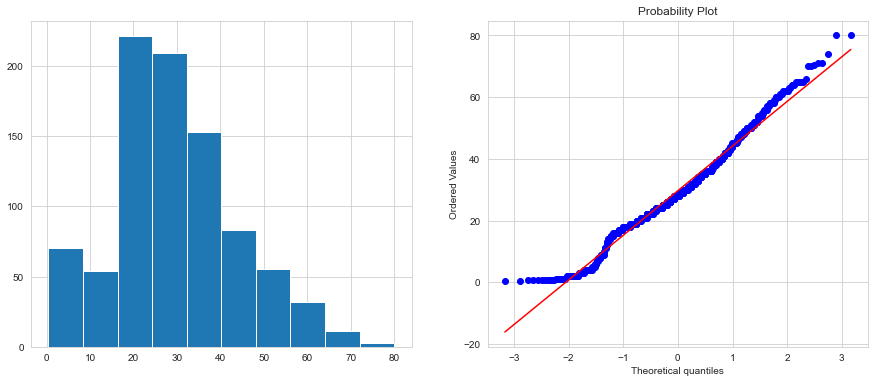

In [10]:
diagnostic_plots(data, 'Age')

From the above graphs we can say that the age column is normally distributed

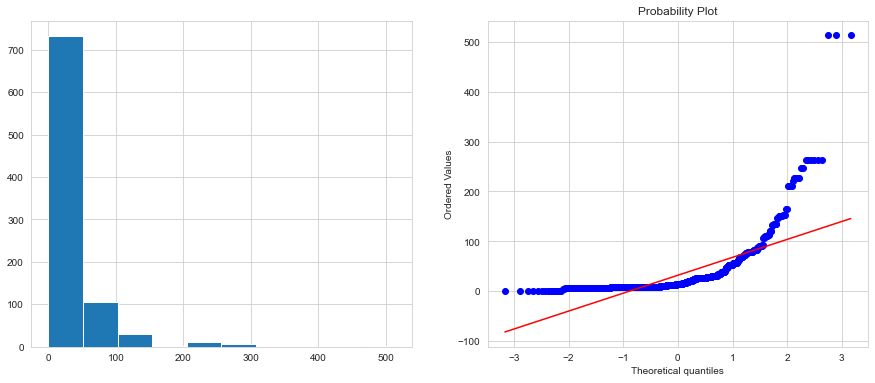

In [11]:
diagnostic_plots(data, 'Fare')

From the above graph we can say that Fare is left skewed
In order to make it normally distributed(gaussian distributed )we perform all the the transformations.

# Logarithmic Transformation

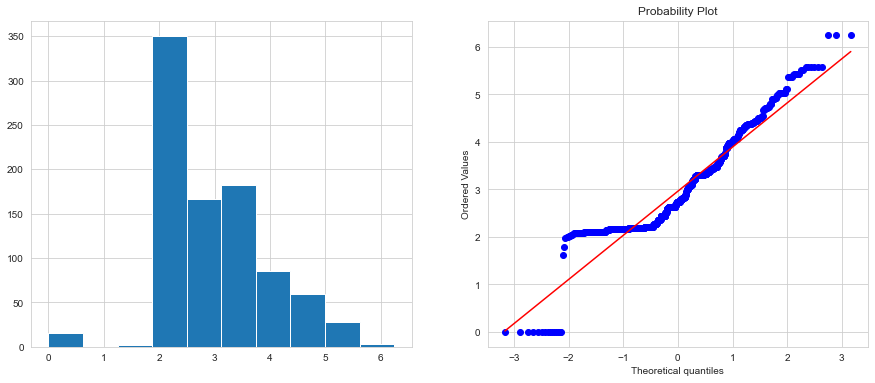

In [12]:
#adding +1 to each record because some records are 0 and log(0) cannot be found
data['Log_Fare']=np.log(data['Fare']+1)
diagnostic_plots(data,'Log_Fare')

The logarithmic distribution does a good job in making Fare variable look Gaussian Distributed

# Reciprocal transformation

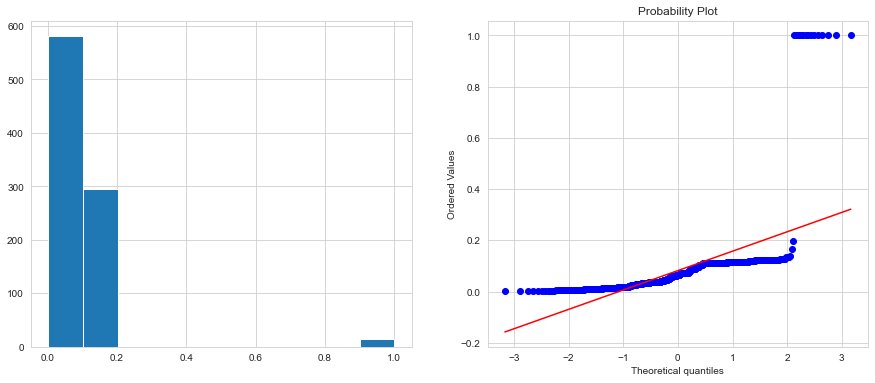

In [13]:
data['Rec_Fare']=1/(data['Fare']+1)
diagnostic_plots(data,'Rec_Fare')

# Sqaure Root Tansformation

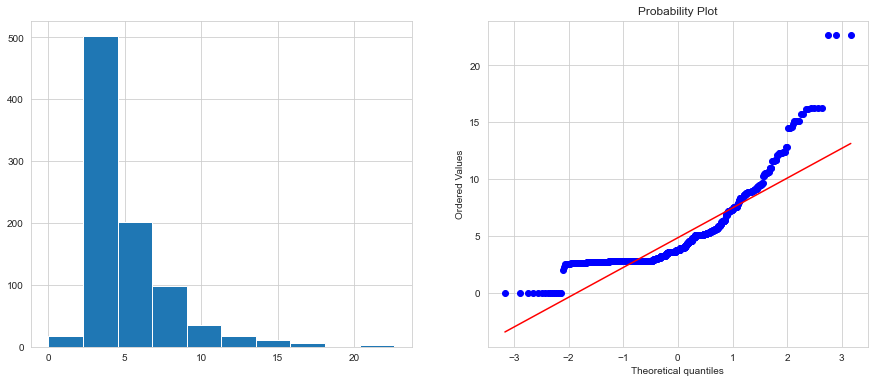

In [14]:

data['sqr_Fare']=data['Fare']**(1/2)
diagnostic_plots(data,'sqr_Fare')

# Exponential Transformation

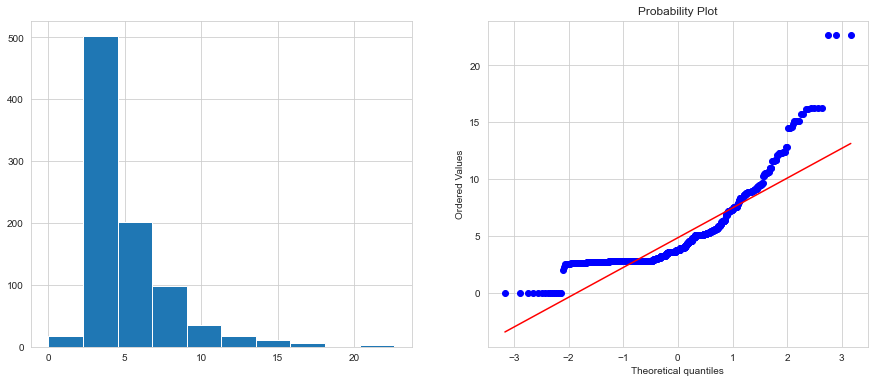

In [15]:
data['Exp_Fare']=data['Fare']**(1/5)
diagnostic_plots(data,'sqr_Fare')

# BoxCox

Optimal lambda:  -0.09778702818680361


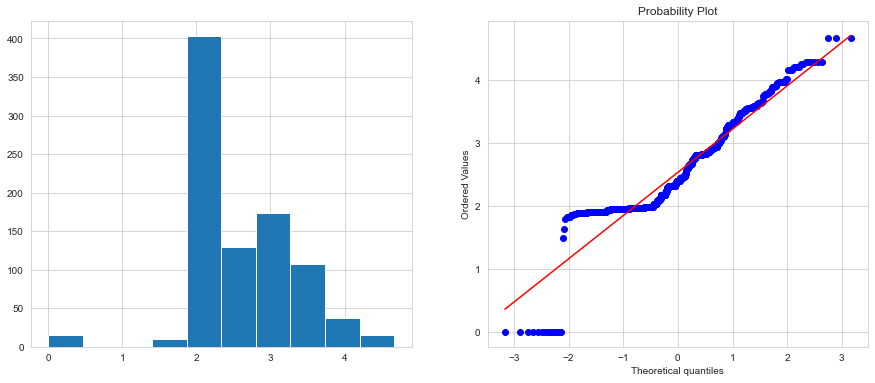

In [16]:

data['Fare_boxcox'], param = stats.boxcox(data.Fare+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(data, 'Fare_boxcox')

In [17]:
import numpy as np
x=20
y=np.log(x+1)
z=np.log1p(x)

In [18]:
print(y,z)

3.044522437723423 3.044522437723423
